In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [73]:
df=pd.read_csv("heart disease.csv")
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [74]:
# As we can see no columns names let's add columns names to the data

In [75]:
df.columns=['age', 'sex', 'chest_pain_type', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [76]:
df

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              199 non-null    int64 
 1   sex              199 non-null    int64 
 2   chest_pain_type  199 non-null    int64 
 3   trestbps         199 non-null    object
 4   chol             199 non-null    object
 5   fbs              199 non-null    object
 6   restecg          199 non-null    int64 
 7   thalach          199 non-null    object
 8   exang            199 non-null    object
 9   oldpeak          199 non-null    object
 10  slope            199 non-null    object
 11  ca               199 non-null    object
 12  thal             199 non-null    object
 13  num              199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+ KB


In [78]:
df.isnull().sum()

age                0
sex                0
chest_pain_type    0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
num                0
dtype: int64

In [79]:
#but as we can see there are'?' present in the dataset
df=df.replace('?',np.nan)

In [80]:
df

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [81]:
df.isnull().sum()

age                  0
sex                  0
chest_pain_type      0
trestbps            56
chol                 7
fbs                  7
restecg              0
thalach             53
exang               53
oldpeak             56
slope              102
ca                 197
thal               165
num                  0
dtype: int64

In [82]:
df.shape

(199, 14)

as we can see 199 rows present and columns like slope ca and thal are missing major value throughout so lets drop this columns.

In [83]:
df

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [84]:
from sklearn.impute import SimpleImputer

In [85]:
si=SimpleImputer(strategy="mean")

In [88]:
df["trestbps"]=si.fit_transform(df["trestbps"].values.reshape(-1,1))
df["chol"]=si.fit_transform(df["chol"].values.reshape(-1,1))
df["thalach"]=si.fit_transform(df["thalach"].values.reshape(-1,1))
df["exang"]=si.fit_transform(df["exang"].values.reshape(-1,1))
df["oldpeak"]=si.fit_transform(df["oldpeak"].values.reshape(-1,1))
df["fbs"]=si.fit_transform(df["fbs"].values.reshape(-1,1))
df["slope"]=si.fit_transform(df["slope"].values.reshape(-1,1))
df["ca"]=si.fit_transform(df["ca"].values.reshape(-1,1))
df["thal"]=si.fit_transform(df["thal"].values.reshape(-1,1))


In [89]:
df

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130.00000,209.0,0.0,1,127.000000,0.000000,0.000000,2.134021,0.0,6.294118,0
1,60,1,4,132.00000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,0.0,6.294118,2
2,55,1,4,142.00000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,0.0,6.294118,1
3,66,1,3,110.00000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0.0,6.294118,0
4,66,1,3,120.00000,0.0,0.0,1,120.000000,0.000000,-0.500000,1.000000,0.0,6.294118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.00000,333.0,1.0,1,154.000000,0.000000,0.000000,2.134021,0.0,6.294118,1
195,62,1,1,133.72028,139.0,0.0,1,122.869863,0.643836,1.309091,2.134021,0.0,6.294118,0
196,55,1,4,122.00000,223.0,1.0,1,100.000000,0.000000,0.000000,2.134021,0.0,6.000000,2
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0.643836,1.309091,2.134021,0.0,6.294118,0


In [90]:
df.isnull().sum()

age                0
sex                0
chest_pain_type    0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
num                0
dtype: int64

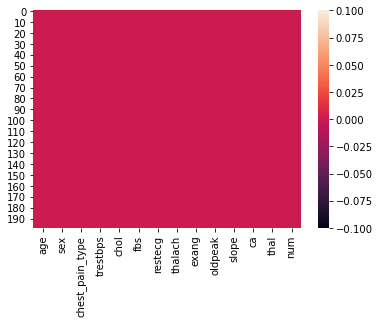

In [91]:
sns.heatmap(df.isnull())

In [92]:
df.corr()

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.033837,-0.039809,0.180915,0.065347,0.126706,0.001487,-0.148786,0.133318,0.154215,0.100705,NaN,0.084719,0.286630
sex,0.033837,1.000000,0.037525,0.012238,-0.096953,-0.054735,0.060305,-0.001016,0.015703,0.096219,0.088371,NaN,-0.078872,0.147190
chest_pain_type,-0.039809,0.037525,1.000000,0.073888,0.063650,-0.045135,0.033617,-0.122405,0.180299,0.036454,0.029214,NaN,0.055849,0.167202
trestbps,0.180915,0.012238,0.073888,1.000000,0.149121,0.186111,0.091401,-0.012047,0.219314,0.113345,0.092285,NaN,0.082832,0.141186
chol,0.065347,-0.096953,0.063650,0.149121,1.000000,0.154537,0.022824,-0.039052,0.084179,-0.005121,0.059860,NaN,-0.071775,0.075094
fbs,0.126706,-0.054735,-0.045135,0.186111,0.154537,1.000000,0.167662,0.049509,-0.210867,-0.093830,0.015394,NaN,0.026318,0.052104
restecg,0.001487,0.060305,0.033617,0.091401,0.022824,0.167662,1.000000,0.013548,-0.082538,-0.111718,-0.018541,NaN,0.052644,-0.033597
thalach,-0.148786,-0.001016,-0.122405,-0.012047,-0.039052,0.049509,0.013548,1.000000,-0.072758,0.178435,-0.123312,NaN,-0.203453,-0.078186
exang,0.133318,0.015703,0.180299,0.219314,0.084179,-0.210867,-0.082538,-0.072758,1.000000,0.304988,0.110798,NaN,0.122933,0.254020
oldpeak,0.154215,0.096219,0.036454,0.113345,-0.005121,-0.093830,-0.111718,0.178435,0.304988,1.000000,0.230157,NaN,0.091694,0.378550


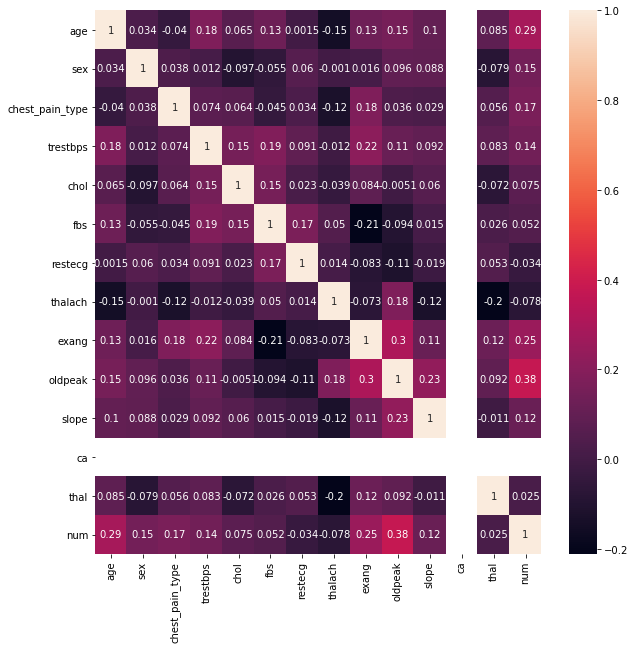

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [94]:
df.describe()

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.000000
mean,59.331658,0.969849,3.502513,133.72028,178.322917,0.354167,0.733668,122.869863,0.643836,1.309091,2.134021,0.0,6.294118,1.517588
std,7.827080,0.171433,0.796928,18.29815,112.144792,0.470958,0.684918,18.867497,0.411203,0.932462,0.467411,0.0,0.527328,1.222038
min,35.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.50000,119.500000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,6.294118,0.000000
50%,60.000000,1.000000,4.000000,133.72028,214.000000,0.000000,1.000000,122.869863,0.643836,1.309091,2.134021,0.0,6.294118,1.000000
75%,64.000000,1.000000,4.000000,140.00000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.134021,0.0,6.294118,3.000000
max,77.000000,1.000000,4.000000,190.00000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


Observation
1)There may be outliers present in the Chol columns.
2)The min and max of thalch columns is also high.


age                   AxesSubplot(0.125,0.749828;0.133621x0.130172)
sex                AxesSubplot(0.285345,0.749828;0.133621x0.130172)
chest_pain_type     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trestbps           AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs                   AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg            AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalach             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exang              AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slope                 AxesSubplot(0.125,0.437414;0.133621x0.130172)
ca                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
thal                AxesSubplot(0.44569,0.437414;0.133621x0.130172)
num                AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

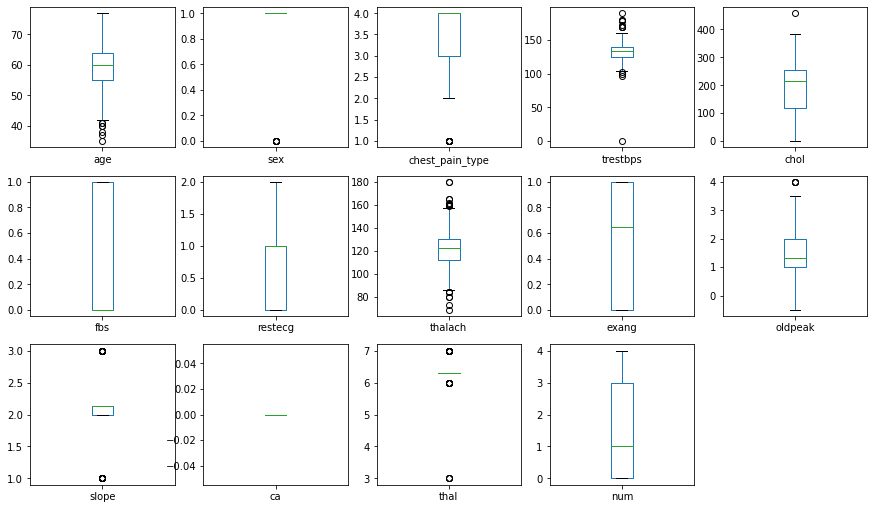

In [95]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

As we can see there are outliers present in thalach and trestbps.

In [96]:
# check tpypes of diagnosis
df["num"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

As per the problem description, 0 means no heart disease and 1-3 represent presence of heart disease

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              199 non-null    int64  
 1   sex              199 non-null    int64  
 2   chest_pain_type  199 non-null    int64  
 3   trestbps         199 non-null    float64
 4   chol             199 non-null    float64
 5   fbs              199 non-null    float64
 6   restecg          199 non-null    int64  
 7   thalach          199 non-null    float64
 8   exang            199 non-null    float64
 9   oldpeak          199 non-null    float64
 10  slope            199 non-null    float64
 11  ca               199 non-null    float64
 12  thal             199 non-null    float64
 13  num              199 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.9 KB


In [98]:
df["chest_pain_type"].unique()

array([4, 3, 2, 1], dtype=int64)

In [99]:
df["chest_pain_type"]=df.chest_pain_type.astype(float)
df["restecg"]=df.restecg.astype(float)
df["sex"]=df.sex.astype(float)

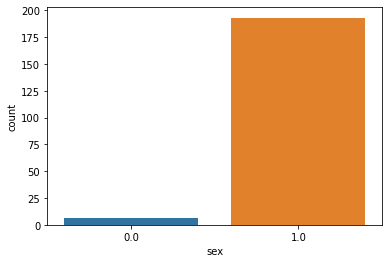

In [100]:
sns.countplot(x="sex",data=df)

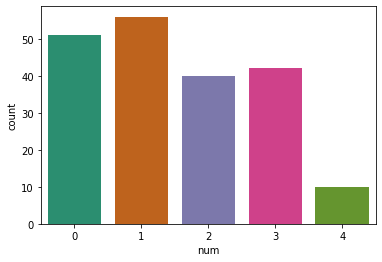

In [101]:
sns.countplot(x="num", data=df, palette="Dark2")

In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['num'] = le.fit_transform(df['num'])
df.head(5)

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.134021,0.0,6.294118,0
1,60,1,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.000000,0.0,6.294118,2
2,55,1,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.000000,0.0,6.294118,1
3,66,1,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.000000,0.0,6.294118,0
4,66,1,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.000000,0.0,6.294118,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              199 non-null    int64  
 1   sex              199 non-null    int64  
 2   chest_pain_type  199 non-null    float64
 3   trestbps         199 non-null    float64
 4   chol             199 non-null    float64
 5   fbs              199 non-null    float64
 6   restecg          199 non-null    float64
 7   thalach          199 non-null    float64
 8   exang            199 non-null    float64
 9   oldpeak          199 non-null    float64
 10  slope            199 non-null    float64
 11  ca               199 non-null    float64
 12  thal             199 non-null    float64
 13  num              199 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 21.9 KB


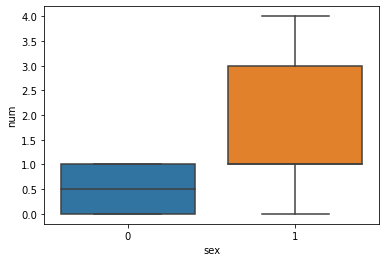

In [104]:
sns.boxplot(x=df['sex'],y=df['num'])

In [105]:
#checking skweness
df.skew()

age               -0.397178
sex               -5.537073
chest_pain_type   -1.641267
trestbps          -1.501953
chol              -0.563256
fbs                0.625593
restecg            0.396540
thalach            0.137597
exang             -0.706686
oldpeak            0.441233
slope             -0.231105
ca                 0.000000
thal              -4.712446
num                0.302681
dtype: float64

In [106]:
#spliting the data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [107]:
x=df.iloc[:,0:-1]
x

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,44,1,4.0,130.00000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.134021,0.0,6.294118
1,60,1,4.0,132.00000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,0.0,6.294118
2,55,1,4.0,142.00000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,0.0,6.294118
3,66,1,3.0,110.00000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,0.0,6.294118
4,66,1,3.0,120.00000,0.0,0.0,1.0,120.000000,0.000000,-0.500000,1.000000,0.0,6.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4.0,127.00000,333.0,1.0,1.0,154.000000,0.000000,0.000000,2.134021,0.0,6.294118
195,62,1,1.0,133.72028,139.0,0.0,1.0,122.869863,0.643836,1.309091,2.134021,0.0,6.294118
196,55,1,4.0,122.00000,223.0,1.0,1.0,100.000000,0.000000,0.000000,2.134021,0.0,6.000000
197,58,1,4.0,133.72028,385.0,1.0,2.0,122.869863,0.643836,1.309091,2.134021,0.0,6.294118


In [108]:
y=df["num"]
y

0      0
1      2
2      1
3      0
4      0
      ..
194    1
195    0
196    2
197    0
198    1
Name: num, Length: 199, dtype: int64

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.963737,0.176318,0.625831,-2.038273e-01,0.274239,-0.753910,0.389832,0.219454,-1.569684,-1.407448,9.524998e-16,0.0,0.000000
1,0.085604,0.176318,0.625831,-9.425097e-02,0.354695,-0.753910,0.389832,0.910208,0.868336,0.205253,1.857386e+00,0.0,0.000000
2,-0.554815,0.176318,0.625831,4.536307e-01,0.444090,-0.753910,0.389832,1.388421,0.868336,1.280387,-2.432291e+00,0.0,0.000000
3,0.854106,0.176318,-0.632152,-1.299591e+00,0.309997,1.374777,1.853543,-1.268322,0.868336,-0.009774,-2.874526e-01,0.0,0.000000
4,0.854106,0.176318,-0.632152,-7.517090e-01,-1.594124,-0.753910,0.389832,-0.152490,-1.569684,-1.945016,-2.432291e+00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-0.682899,-5.671567,0.625831,-3.681918e-01,1.382741,1.374777,0.389832,1.654096,-1.569684,-1.407448,9.524998e-16,0.0,0.000000
195,0.341771,0.176318,-3.148118,1.557173e-15,-0.351529,-0.753910,0.389832,0.000000,0.000000,0.000000,9.524998e-16,0.0,0.000000
196,-0.554815,0.176318,0.625831,-6.421326e-01,0.399392,1.374777,0.389832,-1.215187,-1.569684,-1.407448,9.524998e-16,0.0,-0.559158
197,-0.170564,0.176318,0.625831,1.557173e-15,1.847597,1.374777,1.853543,0.000000,0.000000,0.000000,9.524998e-16,0.0,0.000000


In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=44)

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [172]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [173]:
models=[]
models.append(("LogisticRegression",lr))
models.append(("DecisionTreeCLasifier",dtc))
models.append(("KNeighborsClassifier",knc))
models.append(("RandomForestClassifier",rf))
models.append(("SVC",svc))

In [174]:
Model=[]
confusionmatrix=[]
Accuracyscore=[]
cr=[]
ae=[]
MSE=[]
rms=[]
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    model.score(X_train, y_train)
    print(accuracy_score(y_test, pre))
    Accuracyscore.append(accuracy_score(y_test,pre))
    print(confusion_matrix(y_test, pre))
    confusionmatrix.append(confusion_matrix(y_test, pre))
    print(classification_report(y_test, pre))
    cr.append(classification_report(y_test, pre))
    print('Mean absolute error:', mean_absolute_error(y_test, pre))
    ae.append((mean_absolute_error(y_test, pre)))
    print('Mean squared error:', mean_squared_error(y_test, pre))
    MSE.append((mean_squared_error(y_test, pre)))
    print("\n")
   
    
    

LogisticRegression
0.30303030303030304
[[7 4 0 5 1]
 [9 7 0 2 0]
 [4 4 0 9 1]
 [4 1 0 6 0]
 [0 1 0 1 0]]
              precision    recall  f1-score   support

           0       0.29      0.41      0.34        17
           1       0.41      0.39      0.40        18
           2       0.00      0.00      0.00        18
           3       0.26      0.55      0.35        11
           4       0.00      0.00      0.00         2

    accuracy                           0.30        66
   macro avg       0.19      0.27      0.22        66
weighted avg       0.23      0.30      0.26        66

Mean absolute error: 1.1666666666666667
Mean squared error: 2.5


DecisionTreeCLasifier
0.36363636363636365
[[8 5 1 1 2]
 [3 7 0 6 2]
 [2 4 6 3 3]
 [2 3 1 3 2]
 [0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        17
           1       0.35      0.39      0.37        18
           2       0.67      0.33      0.44        18
           3   

From the observation Random forest clasiifier is working well as compare to other, but not that good.

In [177]:
import pickle
filename = 'heartdisease.pkl'
pickle.dump(rf, open(filename, 'wb'))